In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [2]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_name = '2017_12_09_17_32_24_f12-retention-test'
exp_date = '_'.join(exp_name.split('_')[:3])
experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
cuts = [[15],[2]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
q.set_thresholds(cuts)

name 'fort_exp' is not defined


In [3]:
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

In [4]:
retention = q.apply_thresholds()

In [5]:
tbl_str = "ivar:\t{0:.2f}\tretention:{1:.3f} +- {2:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	0.00	retention:0.998 +- 0.002
ivar:	0.09	retention:0.028 +- 0.006


In [6]:
q.save_experiment_data()

<IPython.core.display.Javascript object>


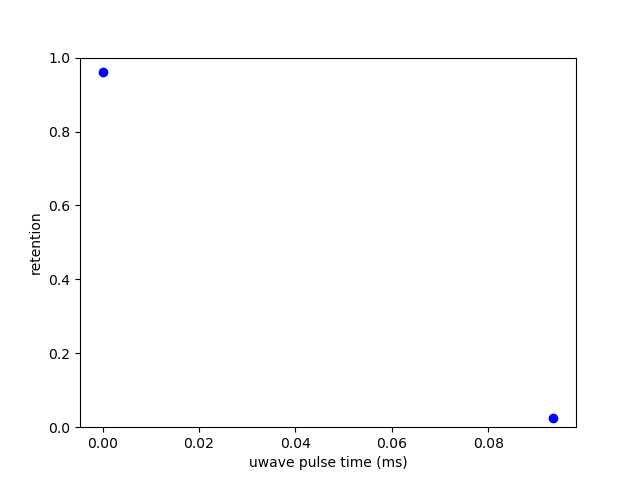

Text(0,0.5,u'retention')

In [33]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.errorbar(retention['ivar'][e], retention['retention'][e],
                yerr=retention['error'][e],
                fmt = 'bo'
    )
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')

<IPython.core.display.Javascript object>


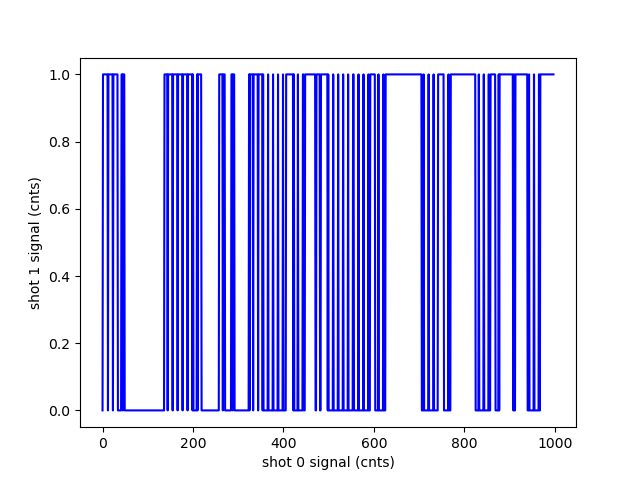

Text(0,0.5,u'shot 1 signal (cnts)')

In [14]:
itr = 1
fig, ax = plt.subplots()
s0_data = q.experiments[0]['iterations'][itr]['quantized_data'][:,0]
s1_data = q.experiments[0]['iterations'][itr]['quantized_data'][:,1]
ax.plot(np.arange(len(s0_data)), s0_data, 'b')

ax.set_xlabel('shot 0 signal (cnts)')
ax.set_ylabel('shot 1 signal (cnts)')

In [17]:
def runs_of_ones_array(bits):
    # make sure all runs of ones are well-bounded
    bounded = np.hstack(([0], bits, [0]))
    # get 1 at run starts and -1 at run ends
    difs = np.diff(bounded)
    run_starts, = np.where(difs > 0)
    run_ends, = np.where(difs < 0)
    return run_ends - run_starts

<IPython.core.display.Javascript object>


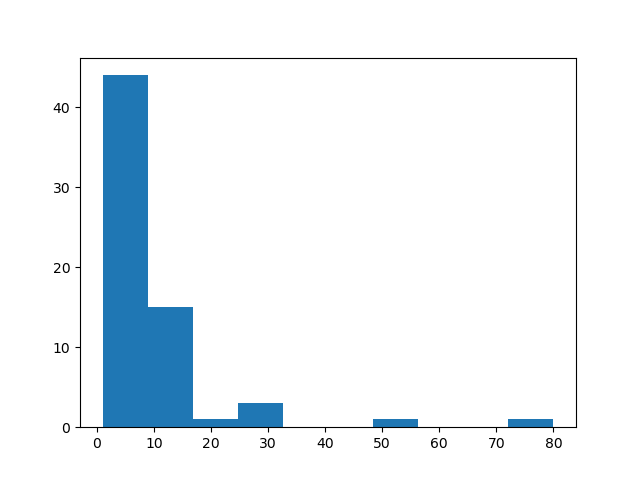

7.70769230769


In [22]:
s0_data = q.experiments[0]['iterations'][1]['quantized_data'][:,0]
fig, ax = plt.subplots()
run_lens = runs_of_ones_array(s0_data)
ax.hist(run_lens)
print np.mean(run_lens)